In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data Preparation

This notebook is used to prepare data for training and testing the models. This is the first step in the data processing pipeline.
`raw_data` is a directory containing raw images of the simulation from the GEANT tool mentioned in Thesis. Due to the licensing reasons, this dataset cannot be publicly available. Raw data for ZP and ZN are loaded, filtered, padded and saved in the `data/` directory.

In [2]:
DATA_DIR = "raw_data/"

In [3]:
def load_proton_a_images(n=None):
    data_a = pd.read_pickle(os.path.join(DATA_DIR, "proton_images2a.pkl"))
    data_b = pd.read_pickle(os.path.join(DATA_DIR, "proton_images2b.pkl"))
    data_c = pd.read_pickle(os.path.join(DATA_DIR, "proton_images2c.pkl"))
    return np.r_[data_a, data_b, data_c][:n]

def load_neutron_a_images(n=None):
    data_a = pd.read_pickle(os.path.join(DATA_DIR, "neutron_images2a.pkl"))
    data_b = pd.read_pickle(os.path.join(DATA_DIR, "neutron_images2b.pkl"))
    data_c = pd.read_pickle(os.path.join(DATA_DIR, "neutron_images2c.pkl"))
    return np.r_[data_a, data_b, data_c][:n]

def load_particle_data_a(n=None):
    data_a = pd.read_pickle(os.path.join(DATA_DIR, "particles_cond_with_mass2a.pkl"))
    data_b = pd.read_pickle(os.path.join(DATA_DIR, "particles_cond_with_mass2b.pkl"))
    data_c = pd.read_pickle(os.path.join(DATA_DIR, "particles_cond_with_mass2c.pkl"))
    return pd.concat([data_a, data_b, data_c], axis=0)[:n]

In [4]:
N_SAMPLES_T0_LOAD = None

data_p = load_proton_a_images(N_SAMPLES_T0_LOAD)
print('Loaded Proton: ',  data_p.shape)

data_n = load_neutron_a_images(N_SAMPLES_T0_LOAD)
print('Loaded Neutron: ',  data_n.shape)

data_cond = load_particle_data_a(N_SAMPLES_T0_LOAD)
print('Loaded cond: ',  data_cond.shape)

Loaded Neutron:  (511810, 44, 44)
Loaded cond:  (511810, 11)


In [5]:
def get_sparsity_data(data_proton, data_neutrod):
    print(data_proton.min(), data_proton.max())
    print(data_neutrod.min(), data_neutrod.max())
    zero_pixels_p = np.sum(data_proton == 0)
    zero_pixels_n = np.sum(data_neutrod == 0)
    print("n of 0 pixel: ", zero_pixels_p)
    print("n of 0 pixel: ", zero_pixels_n)
    total_pixels_p = np.prod(data_proton.shape)
    total_pixels_n = np.prod(data_neutrod.shape)
    print("n of 0 pixel: {:.4f}".format(zero_pixels_p/total_pixels_p))
    print("n of 0 pixel: {:.4f}".format(zero_pixels_n/total_pixels_n))

In [22]:
get_sparsity_data(data_p, data_n)

0.0 765.0
0.0 591.0
n of 0 pixel:  850294962
n of 0 pixel:  952191775
n of 0 pixel: 0.9889
n of 0 pixel: 0.9610


In [5]:
data_p = np.log(data_p)
data_n = np.log(data_n+1)
# print(data_p.min(), data_p.max())
print(data_n.min(), data_n.max())

0.0 6.3835066348840055


In [6]:
data_cond.rename(columns={'PhotonSum': 'neutron_photon_sum'}, inplace=True)

In [7]:
data_cond.neutron_photon_sum = data_cond.neutron_photon_sum.astype(float)
data_cond['proton_photon_sum'] = np.sum(data_p, axis=(1, 2))

In [8]:
data_cond.drop(columns=['Pdg'], inplace=True)
data_cond.head()

,Energy,Vx,Vy,Vz,Px,Py,Pz,neutron_photon_sum,mass,charge
0,513.318,1.454300e-08,3.650510e-08,-0.002731,0.035456,-0.051821,-513.318,291.0,0.000000,0.0
1,1304.340,-1.831820e-05,1.555780e-05,0.050293,-0.509192,0.461106,1304.340,8.0,0.000000,0.0
2,1014.720,-1.831820e-05,1.555780e-05,0.050293,-0.335473,0.256277,1014.720,130.0,0.000000,0.0
3,325.158,0.000000e+00,0.000000e+00,0.000000,0.269915,-0.081921,325.157,0.0,139.570610,-1.0
4,3192.380,0.000000e+00,0.000000e+00,0.000000,0.022422,-0.182957,-3192.380,1256.0,939.565413,0.0


## Describe cond data

In [11]:
data_cond_temp_desc = data_cond_temp = data_cond.drop(columns=['proton_photon_sum', 'neutron_photon_sum'])

In [12]:
data_cond_temp_desc.describe()

,Energy,Vx,Vy,Vz,Px,Py,Pz,mass,charge
count,511810.000000,5.118100e+05,5.118100e+05,511810.000000,511810.000000,511810.000000,511810.000000,511810.000000,511810.000000
mean,1067.253979,5.770311e-07,-2.496696e-08,0.000262,0.034607,0.008323,34.188171,292.969485,0.110701
std,1189.704918,5.403618e-06,4.976473e-06,0.020055,0.297351,0.293054,1597.892822,423.455153,0.387562
min,1.100850,-8.528090e-05,-1.161880e-04,-0.237264,-4.296450,-4.180100,-7000.000000,0.000000,-1.000000
25%,199.091000,-1.823900e-08,-1.039290e-07,-0.001180,-0.082344,-0.104654,-493.273000,0.000000,0.000000
50%,547.029000,0.000000e+00,0.000000e+00,0.000000,0.022301,0.002654,-52.687600,0.000000,0.000000
75%,1582.120000,5.006910e-07,1.318920e-07,0.000167,0.150070,0.110604,599.865000,938.272081,0.000000
max,7000.000000,1.220530e-04,1.164830e-04,0.148707,7.441290,5.334020,7000.000000,1672.450000,1.000000


In [87]:
data_cond_temp_desc.describe().to_latex(index=True,
                  formatters={"name": str.upper},
                  float_format="{:.}".format, # use scientific notation
                              caption="Statistical properties of conditional data"
)

C:\Users\PB\AppData\Local\Temp\ipykernel_26116\1823856941.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data_cond_temp_desc.describe().to_latex(index=True,


'\\begin{table}\n\\centering\n\\caption{Statistical properties of conditional data}\n\\begin{tabular}{lrrrrrrrrr}\n\\toprule\n{} &   Energy &        Vx &        Vy &        Vz &        Px &        Py &        Pz &     mass &    charge \\\\\n\\midrule\ncount & 5.12e+05 &  5.12e+05 &  5.12e+05 &  5.12e+05 &  5.12e+05 &  5.12e+05 &  5.12e+05 & 5.12e+05 &  5.12e+05 \\\\\nmean  & 1.07e+03 &  5.77e-07 & -2.50e-08 &  2.62e-04 &  3.46e-02 &  8.32e-03 &  3.42e+01 & 2.93e+02 &  1.11e-01 \\\\\nstd   & 1.19e+03 &  5.40e-06 &  4.98e-06 &  2.01e-02 &  2.97e-01 &  2.93e-01 &  1.60e+03 & 4.23e+02 &  3.88e-01 \\\\\nmin   & 1.10e+00 & -8.53e-05 & -1.16e-04 & -2.37e-01 & -4.30e+00 & -4.18e+00 & -7.00e+03 & 0.00e+00 & -1.00e+00 \\\\\n25\\%   & 1.99e+02 & -1.82e-08 & -1.04e-07 & -1.18e-03 & -8.23e-02 & -1.05e-01 & -4.93e+02 & 0.00e+00 &  0.00e+00 \\\\\n50\\%   & 5.47e+02 &  0.00e+00 &  0.00e+00 &  0.00e+00 &  2.23e-02 &  2.65e-03 & -5.27e+01 & 0.00e+00 &  0.00e+00 \\\\\n75\\%   & 1.58e+03 &  5.01e-07 &  1.

## Filter Photon Sum

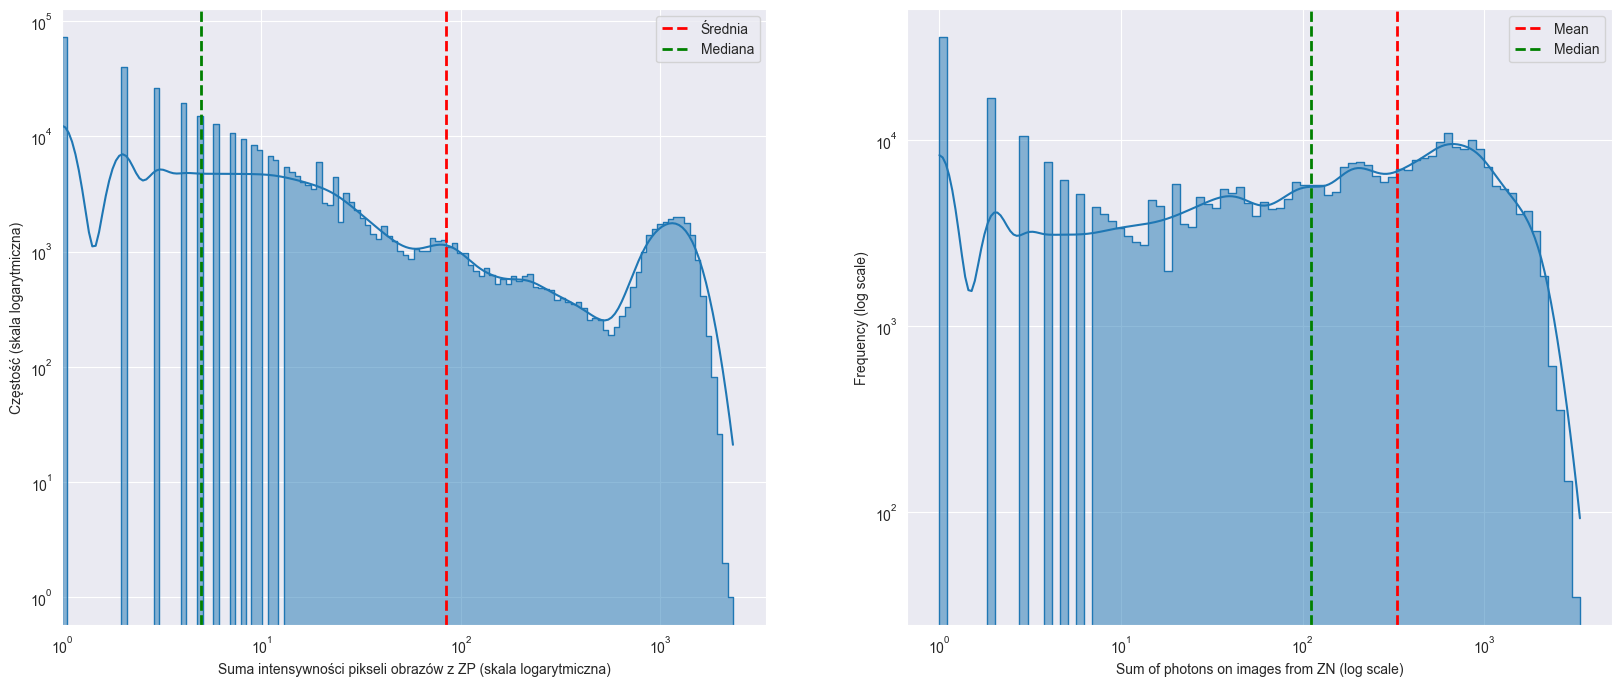

In [10]:
import matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(20, 8))

sns.histplot(data_cond[data_cond.proton_photon_sum!=0].proton_photon_sum, kde=True, ax=ax1, log_scale=(True, True), element="step")
ax1.axvline(data_cond[data_cond.proton_photon_sum != 0].proton_photon_sum.mean(), color='red', linestyle='--', label='Średnia', linewidth=2)
ax1.axvline(data_cond[data_cond.proton_photon_sum != 0].proton_photon_sum.median(), color='green', linestyle='--', label='Mediana', linewidth=2)

sns.histplot(data_cond[data_cond.neutron_photon_sum!=0].neutron_photon_sum, kde=True, ax=ax2, log_scale=(True, True), element="step");
ax2.axvline(data_cond[data_cond.neutron_photon_sum != 0].neutron_photon_sum.mean(), color='red', linestyle='--', label='Mean', linewidth=2)
ax2.axvline(data_cond[data_cond.neutron_photon_sum != 0].neutron_photon_sum.median(), color='green', linestyle='--', label='Median', linewidth=2)

ax1.set(xlabel='Suma intensywności pikseli obrazów z ZP (skala logarytmiczna)', ylabel='Częstość (skala logarytmiczna)')
ax2.set(xlabel='Sum of photons on images from ZN (log scale)', ylabel='Frequency (log scale)')

ax1.legend()
ax2.legend()
ax1.set_xlim(1)
plt.rcParams.update({'font.size': 16})
plt.savefig("../Thesis images/plot_distribution_photon_sum_log_pl.png", bbox_inches="tight", dpi=300)

### See quartile values

In [16]:
# PROTON
# Calculate the quartiles
Q1 = np.percentile(data_cond[data_cond.proton_photon_sum!=0].proton_photon_sum, 25)
Q2 = np.percentile(data_cond[data_cond.proton_photon_sum!=0].proton_photon_sum, 50)
Q3 = np.percentile(data_cond[data_cond.proton_photon_sum!=0].proton_photon_sum, 75)

# Output the quartile values
data_cond[data_cond.proton_photon_sum!=0].proton_photon_sum.min(), Q1, Q2, Q3, data_cond[data_cond.proton_photon_sum!=0].proton_photon_sum.max()

(1.0, 2.0, 5.0, 18.0, 2312.0)

In [17]:
# NEUTRON
# Calculate the quartiles
Q1 = np.percentile(data_cond[data_cond.neutron_photon_sum!=0].neutron_photon_sum, 25)
Q2 = np.percentile(data_cond[data_cond.neutron_photon_sum!=0].neutron_photon_sum, 50)
Q3 = np.percentile(data_cond[data_cond.neutron_photon_sum!=0].neutron_photon_sum, 75)

# Output the quartile values
data_cond[data_cond.neutron_photon_sum!=0].neutron_photon_sum.min(), Q1, Q2, Q3, data_cond[data_cond.neutron_photon_sum!=0].neutron_photon_sum.max()

(1.0, 12.0, 111.0, 510.0, 3360.0)

In [9]:
## Filter Photon Sum
def filter_photon_sum(data_p, data_n, data_conditional, min_photon_sum=5, max_photon_sum=None, which='both'):
    """
    Returns particle data and responses of experiments with minimum sum of photons.
    """
    if max_photon_sum is not None:
        if which == 'both':
            mask = (data_conditional.proton_photon_sum >= min_photon_sum)\
                   & (data_conditional.proton_photon_sum <= max_photon_sum)\
                   & (data_conditional.neutron_photon_sum >= min_photon_sum)\
                   & (data_conditional.neutron_photon_sum <= max_photon_sum)
        elif which == 'proton':
            print('min max proton')
            mask = (data_conditional.proton_photon_sum >= min_photon_sum)\
                   & (data_conditional.proton_photon_sum <= max_photon_sum)
        elif which == 'neutron':
            mask = (data_conditional.neutron_photon_sum >= min_photon_sum)\
                   & (data_conditional.neutron_photon_sum <= max_photon_sum)
        else:
            print(f"Undefined parameter value: {which}")
            return
    else:
        if which == 'both':
            mask = (data_conditional.proton_photon_sum >= min_photon_sum) & (data_conditional.neutron_photon_sum >= min_photon_sum)
        elif which == 'proton':
            mask = (data_conditional.proton_photon_sum >= min_photon_sum)
        elif which == 'neutron':
            mask = (data_conditional.neutron_photon_sum >= min_photon_sum)
        else:
            print(f"Undefined parameter value: {which}")
            return

    return data_p[mask], data_n[mask], data_conditional[mask].reset_index(drop=True)

MIN_PHOTON_SUM = 510
MAX_PHOTON_SUM = None

data_p = pd.DataFrame()

data_p, data_n, data_cond = filter_photon_sum(data_p, data_n, data_cond, min_photon_sum=MIN_PHOTON_SUM, max_photon_sum=MAX_PHOTON_SUM, which='neutron')
print(data_p.shape, data_n.shape, data_cond.shape)

# photon_sum_proton_min, photon_sum_proton_max = int(data_cond.proton_photon_sum.min()), int(data_cond.proton_photon_sum.max())
photon_sum_neutron_min, photon_sum_neutron_max = int(data_cond.neutron_photon_sum.min()), int(data_cond.neutron_photon_sum.max())
photonsums_intervals_str = f"neutron_{photon_sum_neutron_min}_{photon_sum_neutron_max}"  # proton_{photon_sum_proton_min}_{photon_sum_proton_max}
photonsums_intervals_str

C:\Users\PB\AppData\Local\Temp\ipykernel_20668\87582569.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return data_p[mask], data_n[mask], data_conditional[mask].reset_index(drop=True)


(0, 0) (100144, 44, 44) (100144, 10)


'neutron_510_3360'

## Save filtered data

In [10]:
data_cond

,Energy,Vx,Vy,Vz,Px,Py,Pz,neutron_photon_sum,mass,charge
0,3192.380,0.000000e+00,0.000000e+00,0.000000e+00,0.022422,-0.182957,-3192.380,1256.0,939.565413,0.0
1,2770.100,1.861170e-17,2.517190e-17,-1.689330e-13,0.305187,0.412760,-2770.100,1122.0,497.611000,0.0
2,2985.510,0.000000e+00,0.000000e+00,0.000000e+00,-0.378901,0.170025,2985.510,1113.0,939.565413,0.0
3,2048.130,5.136370e-07,6.210270e-07,-2.675780e-03,0.339655,0.477147,-2048.130,1320.0,0.000000,0.0
4,970.674,9.673010e-06,6.184200e-07,4.265670e-02,0.245022,0.075583,970.674,560.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
100139,1079.270,-1.633470e-06,1.901810e-06,1.598340e-02,-0.055418,0.160933,1079.270,511.0,0.000000,0.0
100140,1739.010,0.000000e+00,0.000000e+00,0.000000e+00,0.216142,-0.421519,-1739.010,753.0,1115.683000,0.0
100141,1775.280,-3.317000e-17,-3.109770e-18,-1.414050e-13,-0.416436,-0.039042,-1775.280,689.0,497.611000,0.0
100142,4003.600,0.000000e+00,0.000000e+00,0.000000e+00,0.769178,-0.276743,4003.600,1419.0,1115.683000,0.0


In [11]:
# save conditional data
data_cond.to_pickle(os.path.join(DATA_DIR, f"mgr/data_cond_neutron_photonsum_{photonsums_intervals_str}.pkl"))

In [20]:
# save proton data
with open(os.path.join(DATA_DIR, f"mgr/data_photonsum_{photonsums_intervals_str}.pkl"), 'wb') as f:
    pickle.dump(data_p, f)

In [12]:
# save neutron data
with open(os.path.join(DATA_DIR, f"mgr/data_neutron_photonsum_{photonsums_intervals_str}.pkl"), 'wb') as f:
    pickle.dump(data_n, f)

#### Plot padding

### Proton images

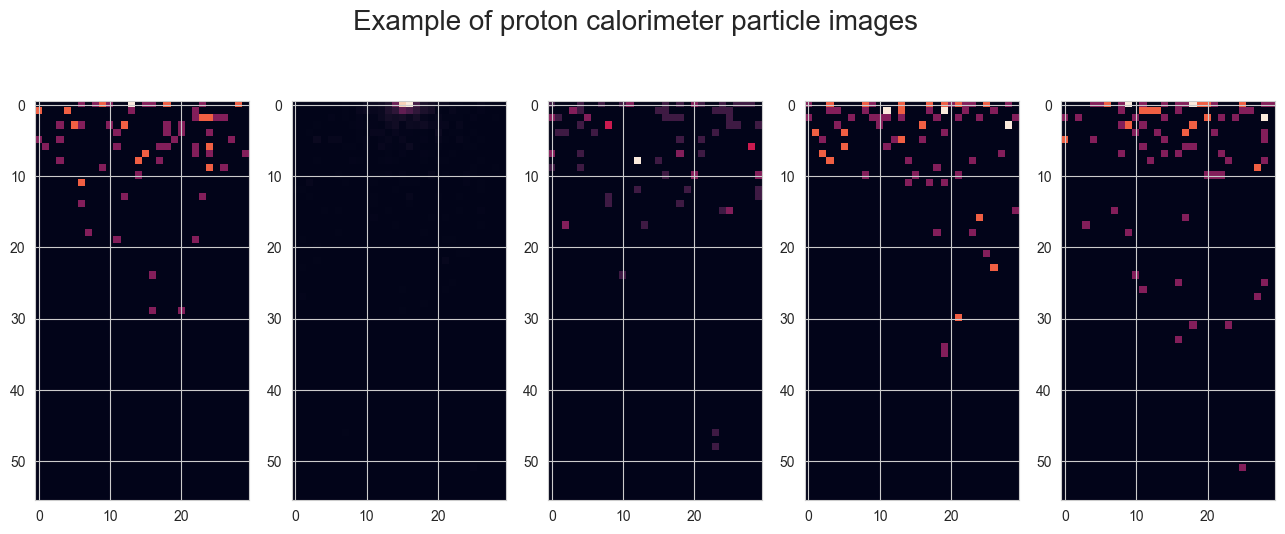

In [13]:
fig, ax = plt.subplots(1, 5, figsize=(16, 6))
ax[0].imshow(data_p[2], interpolation='none')
ax[1].imshow(data_p[3], interpolation='none')
ax[2].imshow(data_p[4], interpolation='none')
ax[3].imshow(data_p[5], interpolation='none')
ax[4].imshow(data_p[6], interpolation='none')
fig.suptitle("Example of proton calorimeter particle images", fontsize=20)
fig.savefig("example_proton_images.png", bbox_inches="tight", dpi=300)

### Neutron images

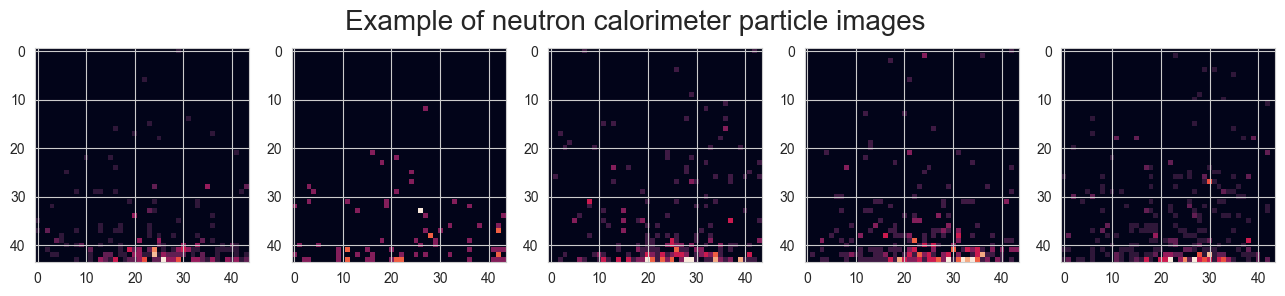

In [14]:
fig, ax = plt.subplots(1, 5, figsize=(16, 3))
ax[0].imshow(data_n[2], interpolation='none')
ax[1].imshow(data_n[3], interpolation='none')
ax[2].imshow(data_n[4], interpolation='none')
ax[3].imshow(data_n[5], interpolation='none')
ax[4].imshow(data_n[6], interpolation='none')
fig.suptitle("Example of neutron calorimeter particle images", fontsize=20)
fig.savefig("example_neutron_images.png", bbox_inches="tight", dpi=300)